## Monte Carlo Exercise 1 
# Lorenzo Speri and Carlo Tombolini


the feature variable $X \in [0,1]$ is a real-valued and 1-dimensional, and the response $Y \in \{0, 1\}$ 
$$p(Y=0) = p(Y=1) = 1/2$$
$$p(X = x| Y = 0) = 2 - 2x$$
$$p(X = x| Y = 1) = 2x$$

Applying the Bayes formula
$$
p(Y|X) = \frac{p(X|Y) p(Y)}{p(X)}
$$
to our likelihoods, we obtain the feature density
$$p(X) = p(X|Y=0)p(Y=0) + p(X|Y=1)p(Y=1) = 1$$
So the posteriors are
\begin{eqnarray}
p(Y=0|X) = 1-x\\
p(Y=1|X) = x \\
\end{eqnarray}

In order to find the data set we apply the following algorithm:
<br>
sample $Y \in \{0,1\}$  
<br>
find the features $x$ using the inverse transform sampling:
$$CP(x|Y) = \int_0 ^{x'} P(X=x'|Y) dx'$$
where CP is the cumulative distribution. 
If $Y = 0$
$$
CP(x|Y=0)= \int_0 ^{x'} 2-2x' dx' = 2(x-\frac{x^2}{2})
$$
If $Y = 1$
$$
CP(x|Y=1)= \int_0 ^{x'} 2x' dx' = x^2)\\
$$
So we sample $u$ from a uniform distribution $[0,1)$ in order to obtain $x$ according to the different cases $Y =0$ or $1$
$$
u \equiv CP(x|Y)
$$
For $Y = 0$ the correspondent features will be $x = 1- \sqrt{1-u}$
<br>
For $Y=1$ the correspondent features will be $x=\sqrt{u}$


In [1]:
# importing the libraries
import numpy as np
import sklearn
import matplotlib.pyplot as plt
# define the size of the data set
N = 10000

In [2]:
y = np.random.randint(2, size=N)
#print(y)

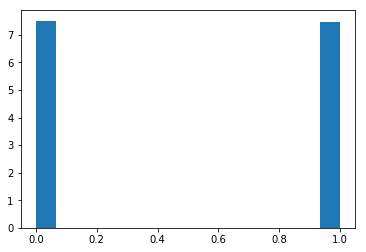

In [3]:
# plot check
count, bins, ignored = plt.hist(y, 15, density=True)
#plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

In [3]:
# generate uniform distribution of u
#u = np.random.uniform(0,1,1)
# define x
x = np.array([])
# array benchmark of p(x|y=0)
x_y0 = np.array([])
# array benchmark of p(x|y=1)
x_y1 = np.array([])

# get the featrues x
for k in range(N):
    u = np.random.uniform(0,1,1)
    if y[k]==0:
        #all_primes = np.append(all_primes,[n])
        x = np.append(x,[1 - np.sqrt(1-u)]) 
        x_y0 = np.append(x_y0,[1 - np.sqrt(1-u)]) 
    else:
        x = np.append(x,[np.sqrt(u)])
        x_y1 = np.append(x_y1,[np.sqrt(u)])


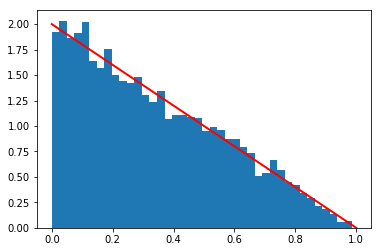

In [4]:
# check the distribution of p(x|y=0)
# plot check
count, bins, ignored = plt.hist(x_y0, 40, density=True)
plt.plot([0, 1], [2, 0], 'r-', lw=2)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

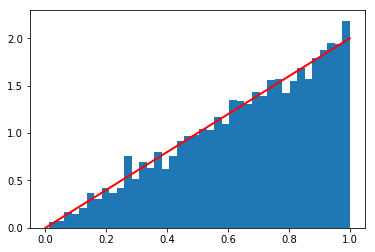

In [5]:
# check the distribution of p(x|y=1)
# plot check
count, bins, ignored = plt.hist(x_y1, 40, density=True)
plt.plot([0, 1], [0, 2], 'r-', lw=2)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

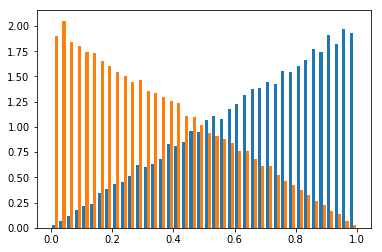

In [25]:
# plot check
count, bins, ignored = plt.hist([x_y1,x_y0], 40, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

In [46]:
## CLASSIFICATION BY THRESHOLDING
# M vector
M = np.array([10, 100, 1000, 10000])
# Repetition per M(columns)
C = 10
# Rows
R = 4
# Thresholding vector
x_t = np.array([0.2, 0.5, 0.6])
# Theoretical error vector
err_theo = 1 / 4 + np.power(x_t - 1/2, 2)
# Experimental error
err_exp = np.zeros((3*R,C))
# Cycle over the thresholds
for t in range(3):
    # Cycle over the M
    for m in range(4):
        #Cycle over the 10 repetition at fixed M
        for c in range(C):
            y = np.random.randint(2, size=M[m])
            # define x
            x = np.array([])
            # y_hat vector
            y_hat = np.array([])
            # Count variable for error
            count = 0
            # get the featrues x
            for k in range(M[m]):
                u = np.random.uniform(0,1,1)
                if y[k]==0:
                    x = np.append(x,[1 - np.sqrt(1-u)])  
                else:
                    x = np.append(x,[np.sqrt(u)]) 
                # Use of the threshold
                if x[k] <= x_t[t]:
                    y_hat = np.append(y_hat,[0])
                    if y_hat[k] != y[k]:
                        count = count + 1
                else:
                    y_hat = np.append(y_hat,[1])
                    if y_hat[k] != y[k]:
                        count = count + 1
            err_exp.itemset(((4*t+m),c), (count / M[m]))
            #err_exp=count/N
#print("\n")
#print(err_exp, err_theo)




In [54]:
# Mean values
avg = np.zeros((3,4))
err_avg = np.zeros((3,4))
i, j = 0, 0
for r in range(3*R):
    avg.itemset((i,j), np.mean(err_exp[r,:]))
    err_avg.itemset((i,j), np.std(err_exp[r,:]))
    j = j + 1
    if j==4:
        j = 0
        i = i + 1
print("\n")
print(avg)
print(err_avg)




[[ 0.34     0.325    0.3445   0.33893]
 [ 0.28     0.272    0.2485   0.24914]
 [ 0.23     0.259    0.2518   0.25775]]
[[ 0.1496663   0.0456618   0.00922226  0.00345197]
 [ 0.09797959  0.04190465  0.01285496  0.00321783]
 [ 0.11        0.04592385  0.01396997  0.00524524]]
3.27771342185
43.3567718963
31.6227766017


In [81]:
 from IPython.display import HTML, display

 data = [['','M = 10','M = 100','M = 1000','M = 10000'],
         ['$x_t$=0.2',"%.1f $\pm$ %.1f" % (avg[0,0], err_avg[0,0]),"%.2f $\pm$ %.2f" % (avg[0,1], err_avg[0,1]),"%.3f $\pm$ %.3f" % (avg[0,2], err_avg[0,2]),"%.3f $\pm$ %.3f" % (avg[0,3], err_avg[0,3])],
         ['$x_t$=0.5',"%.1f $\pm$ %.1f" % (avg[1,0], err_avg[1,0]),"%.2f $\pm$ %.2f" % (avg[1,1], err_avg[1,1]),"%.2f $\pm$ %.2f" % (avg[1,2], err_avg[1,2]),"%.3f $\pm$ %.3f" % (avg[1,3], err_avg[1,3])],
         ['$x_t$=0.6',"%.1f $\pm$ %.1f" % (avg[2,0], err_avg[2,0]),"%.2f $\pm$ %.2f" % (avg[2,1], err_avg[2,1]),"%.2f $\pm$ %.2f" % (avg[2,2], err_avg[2,2]),"%.3f $\pm$ %.3f" % (avg[2,3], err_avg[2,3])],
         ]

 display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

,M = 10,M = 100,M = 1000,M = 10000
$x_t$=0.2,0.3 $\pm$ 0.1,0.33 $\pm$ 0.05,0.344 $\pm$ 0.009,0.339 $\pm$ 0.003
$x_t$=0.5,0.3 $\pm$ 0.1,0.27 $\pm$ 0.04,0.25 $\pm$ 0.01,0.249 $\pm$ 0.003
$x_t$=0.6,0.2 $\pm$ 0.1,0.26 $\pm$ 0.05,0.25 $\pm$ 0.01,0.258 $\pm$ 0.005
